# **Proyek Analisis Data: Bike Sharing Dataset**

---


- Nama: MUHAMAD BRIYAN LATUCONSINA
- Email: ryanltcsn@gmail.com
- Id Dicoding: nikolay

**Keterangan Dataset yang Dipakai**

In [ ]:
file_readme = "data/Readme.txt"

In [22]:
with open(file_readme, "r") as file:
    isi_file = file.read()
    print(isi_file)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

## 1. **Menentukan Pertanyaan Bisnis**

---



- Bagaimana perbandingan jumlah pengguna penyewaan sepeda yang registered dengan pengguna casual?
- Apakah terdapat korelasi antara kondisi tempratur dengan jumlah pengguna penyewaan sepeda?
- Pada musim manakah terdapat total penyewaan sepeda paling tinggi?
- Bagaimanan pola penyewaan sepeda berdasarkan hari dalam seminggu?
- Bagaimana efek dari cuaca terhadap jumlah total penyewaan sepeda?

## 2. **Menyiapkan semua library yang dibutuhkan**


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. **Data Wrangling**


---



3.1 Gathering Data

* Mengumpulkan Day Data

In [23]:
day_df = pd.read_csv("https://raw.githubusercontent.com/bangbrayens/submission-data-analysis/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Mengumpulkan Hour Data

In [24]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/bangbrayens/submission-data-analysis/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada kedua dataset tersebut memiliki data yang sangat mirip. Perbedaannya hanya pada kolom hr di **hour.csv.** Karena tidak ada pertanyaan bisnis mengenai penggunaan layanan berbagi sepeda setiap jam, cukup menggunakan kumpulan data **day.csv** saja untuk efisiensi.

3.2 Assessing Data

* Melihat Tipe Data

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


 **Ada beberapa hal yang perlu diperbaiki:**

1. Beberapa nama kolom agak sulit dibaca, ubahlah agar lebih mudah dibaca. Misalnya, *yr -> year*.
2. Ubah tipe data kolom *dteday* dari integer menjadi datetime.
3. Nilai pada kolom *season* dan *weathersit* masih bilangan bulat, ubah menjadi string untuk pemahaman yang lebih baik. Misalnya, 1 -> Spring.
4. Nilai *yr, month*, dan *weekday* juga dalam format bilangan bulat, ubah nilainya menjadi *datetime* dan waktu sebenarnya. Misalnya, 0 -> 2011.

* Melihat Missing Value


In [26]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada dataset

* Melihat Data Duplikasi


In [27]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


* Melihat seluruh statistk data

In [28]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Tidak ada anomali dalam ringkasan dataset.

Namun menurut karakteristik kumpulan data, variabel *temp, atemp, hum,* dan *windspeed* dinormalisasi. Untuk memperoleh pemahaman yang lebih baik tentang kondisi kehidupan nyata, sesuaikan nilai-nilai ini ke bentuk yang telah dinormalisasi sebelumnya.

3.3 Cleaning Data

* Memperbaiki beberapa kolom nama



In [29]:
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Memperbaiki tipe data pada kolom *dteday*

In [30]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

* Mengubah nilai pada kolom *season* dan *weather*

In [31]:
day_df["season"] = day_df["season"].map(
    {
        1: "Spring",
        2: "Summer",
        3: "Fall",
        4: "Winter",
    }
)

day_df["weather"] = day_df["weather"].map(
    {
        1: "Clear",
        2: "Cloudy",
        3: "Light Rain",
        4: "Heavy Rain",
    }
)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3.4 Mengubah nilai pada kolom *weekday*, *month* dan *year*

In [32]:
day_df["weekday"] = day_df["dateday"].dt.day_name()

day_df["month"] = day_df["dateday"].dt.month_name()

day_df["year"] = day_df["dateday"].dt.year

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3.5 Menormalisasikan nilai pada kolom *temp*, *atemp*, *hum* dan *windspeed*

In [33]:
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


3.6 Menghapus kolom yang tidak relevan/dibutuhkan

In [34]:
day_df.drop(labels="instant", axis=1, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   year        731 non-null    int64         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.8+ 

3.7 Mengexport dataset yang sudah dibersihkan

In [36]:
day_df.to_csv("main_data.csv", index=False)

## 4. **Exploratory Data Analysis (EDA)**

4.1 Mengecek seluruh statistik dataset yang telah dibersihkan

In [37]:
day_df.describe(include="all")

<ipython-input-37-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Tidak anomali pada dataset yang sudah dibersihkan

4.2 Penyewaan sepeda berdasarkan jenis penggunanya *(type)*

In [38]:
day_df[["casual", "registered"]].describe().style.format("{:.0f}")

,casual,registered
count,731,731
mean,848,3656
std,687,1560
min,2,20
25%,316,2497
50%,713,3662
75%,1096,4776
max,3410,6946


In [39]:
users_by_type = day_df[["casual", "registered"]].sum()

users_by_type

casual         620017
registered    2672662
dtype: int64

Dapat diketahui, berdasarkan statistik yang ada, pengguna penyewaan sepeda registered lebih banyak hingga 4x lipat daripada casual.

4.3 Penyewaan sepeda berdasarkan musim *(seasons)*

In [40]:
users_by_season = day_df.groupby(by="season").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_season.style.format("{:.0f}")
users_by_season.sort_values(by=("count"), ascending=False)

,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


Dapat diketahui bahwa jumlah penyewaan sepeda tertinggi terdapat pada musim gugur dan terendah pada musim semi.

4.4 Penyewaan sepeda berdasarkan tahun *(year)*

In [41]:
users_by_year = day_df.groupby(by="year").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_year.style.format("{:.0f}")

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Dapat diketahui terdapat peningkatan penyewaan sepeda secara signifikan dari tahun 2011 hingga 2012.

4.5 Penyewaan sepeda berdasarkan bulan *(month)*

In [42]:
users_by_month = day_df.groupby(by="month").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_month.style.format("{:.0f}")
users_by_month.sort_values(by=("count"), ascending=False)

,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


Dapat diketahui bahwa penyewaan sepeda mengalami peningkatan paling tinggi pada bulan Agustus dan paling rendah pada bulan Januari.

4.6 Penyewaan sepeda berdasarkan hari *(day)*

In [43]:
users_by_weekday = day_df.groupby(by="weekday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weekday.style.format("{:.0f}")
users_by_weekday.sort_values(by=("count"), ascending=False)

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [44]:
users_by_holiday = day_df.groupby(by="holiday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_holiday.style.format("{:.0f}")

,casual,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [45]:
users_by_workingday = day_df.groupby(by="workingday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_workingday.style.format("{:.0f}")

,casual,registered,count
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


1. Dapat diketahui bahwa penyewaan sepeda paling tinggi terdapat pada hari Jum'at.
2. Penyewaan sepeda mengalami penurunan yang signifikan pada akhir pekan, terutama hari libur.
3. Namun terdapat pengecualian bagi pengguna penyewa sepeda yang casual, karena jumlahnya cukup tinggi pada akhir pekan.

4.7 Penyewaan sepeda berdasarkan cuaca *(weather)*

In [46]:
users_by_weather = day_df.groupby(by="weather").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weather.style.format("{:.0f}")
users_by_weather.sort_values(by=("count"), ascending=False)

,casual,registered,count
weather,,,
Clear,446346,1811606,2257952
Cloudy,169776,827082,996858
Light Rain,3895,33974,37869


Dapat diketahui bahwa penyewaan sepeda sangat tinggi pada saat cuaca cerah, namun sangat rendah pada saat hujan.

4.8 Korelasi antara jumlah *(count)* penyewaan sepeda dengan *temp, atemp, hum,* dan *windspeed*

In [47]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
day_df[selected_columns].corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000



1. Dapat diketahui bahwa jumlah penyewaan sepeda memiliki korelasi positif *(moderate)* dengan *temp, atemp, hum,* dan *windspeed*. Dapat diartikan bahwa jumlah penyewaan sepeda meningkat seiring dengan bertambahnya suhu/tempratur.
2. Dapat diketahui juga terdapat sedikit korelasi negatif antara jumlah penyewaan sepeda dengan *hum, windspeed.*

4.9 Correlation Heat Map

In [48]:
day_df.corr(numeric_only=True)

,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,count
year,1.000000,0.007954,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.007954,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.002013,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.047604,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.046106,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,-0.110651,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.011817,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.248546,0.054274,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.594248,-0.108745,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.566710,-0.068348,0.061156,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


<Axes: >

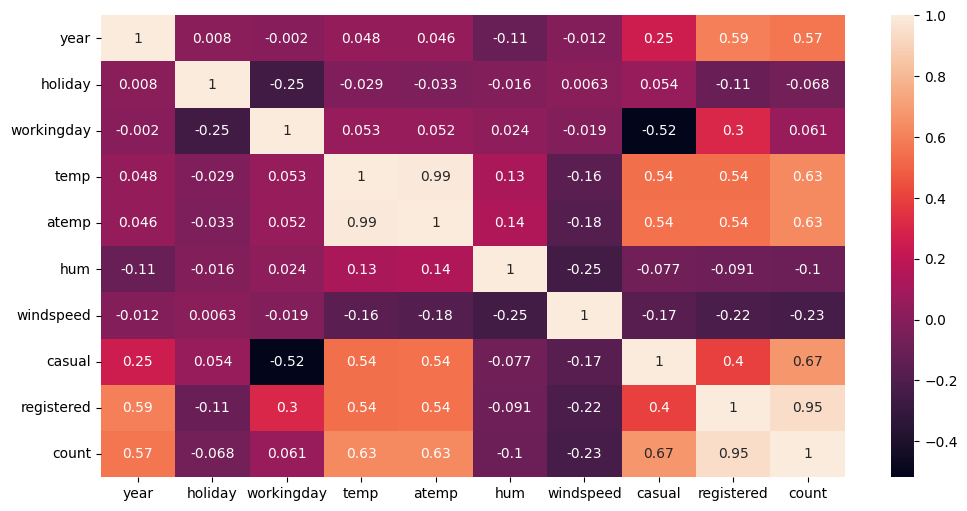

In [49]:
plt.figure(figsize=(12, 6))


sns.heatmap(day_df.corr(numeric_only=True), annot=True)

## 5. **Visualization & Explanatory Analysis**

Pada bagian ini, pertanyaan bisnis yang akan dijawab disertai dengan visualisasi.

### Pertanyaan 1: Bagaimana perbandingan jumlah pengguna penyewaan sepeda yang registered dengan pengguna casual?

In [50]:
users_by_type = users_by_type.reset_index()
users_by_type = users_by_type.rename(columns={"index": "type", 0: "total"})

users_by_type

,type,total
0,casual,620017
1,registered,2672662


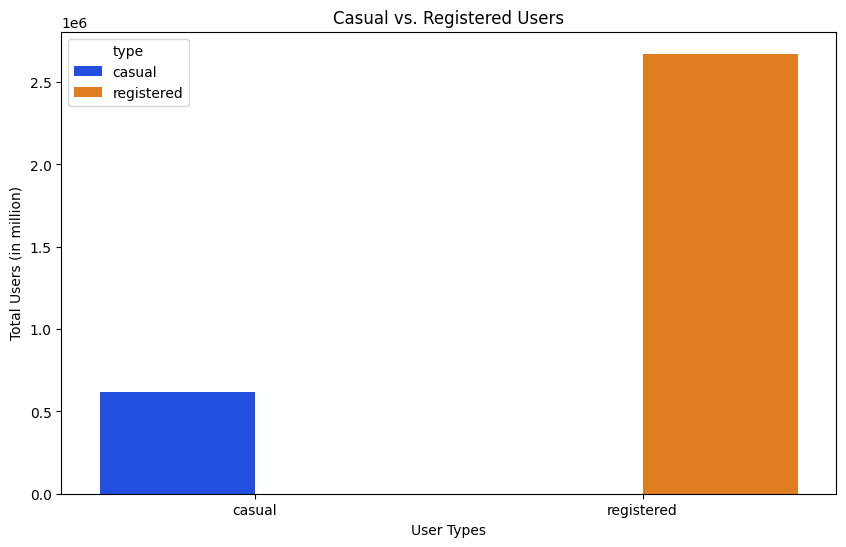

In [51]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="type",
    y="total",
    hue="type",
    data=users_by_type,
    palette="bright",
)
plt.title("Casual vs. Registered Users")
plt.xlabel("User Types")
plt.ylabel("Total Users (in million)")
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa perbandingan total pengguna penyewaan sepeda dengan pengguna registered jauh lebih tinggi dibandingkan dengan pengguna casual. Perbedaannya hampir 4x lebih tinggi selama 2 tahun terakhir.

### Pertanyaan 2: Apakah terdapat korelasi antara kondisi tempratur dengan jumlah pengguna penyewaan sepeda?


In [52]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
temp_count_etc = day_df[selected_columns]

temp_count_etc.corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


<Axes: >

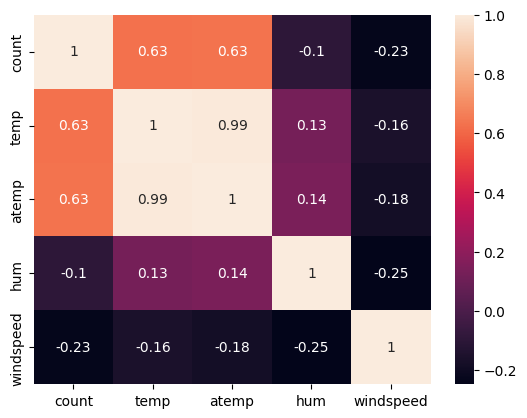

In [53]:
sns.heatmap(temp_count_etc.corr(numeric_only=True), annot=True)

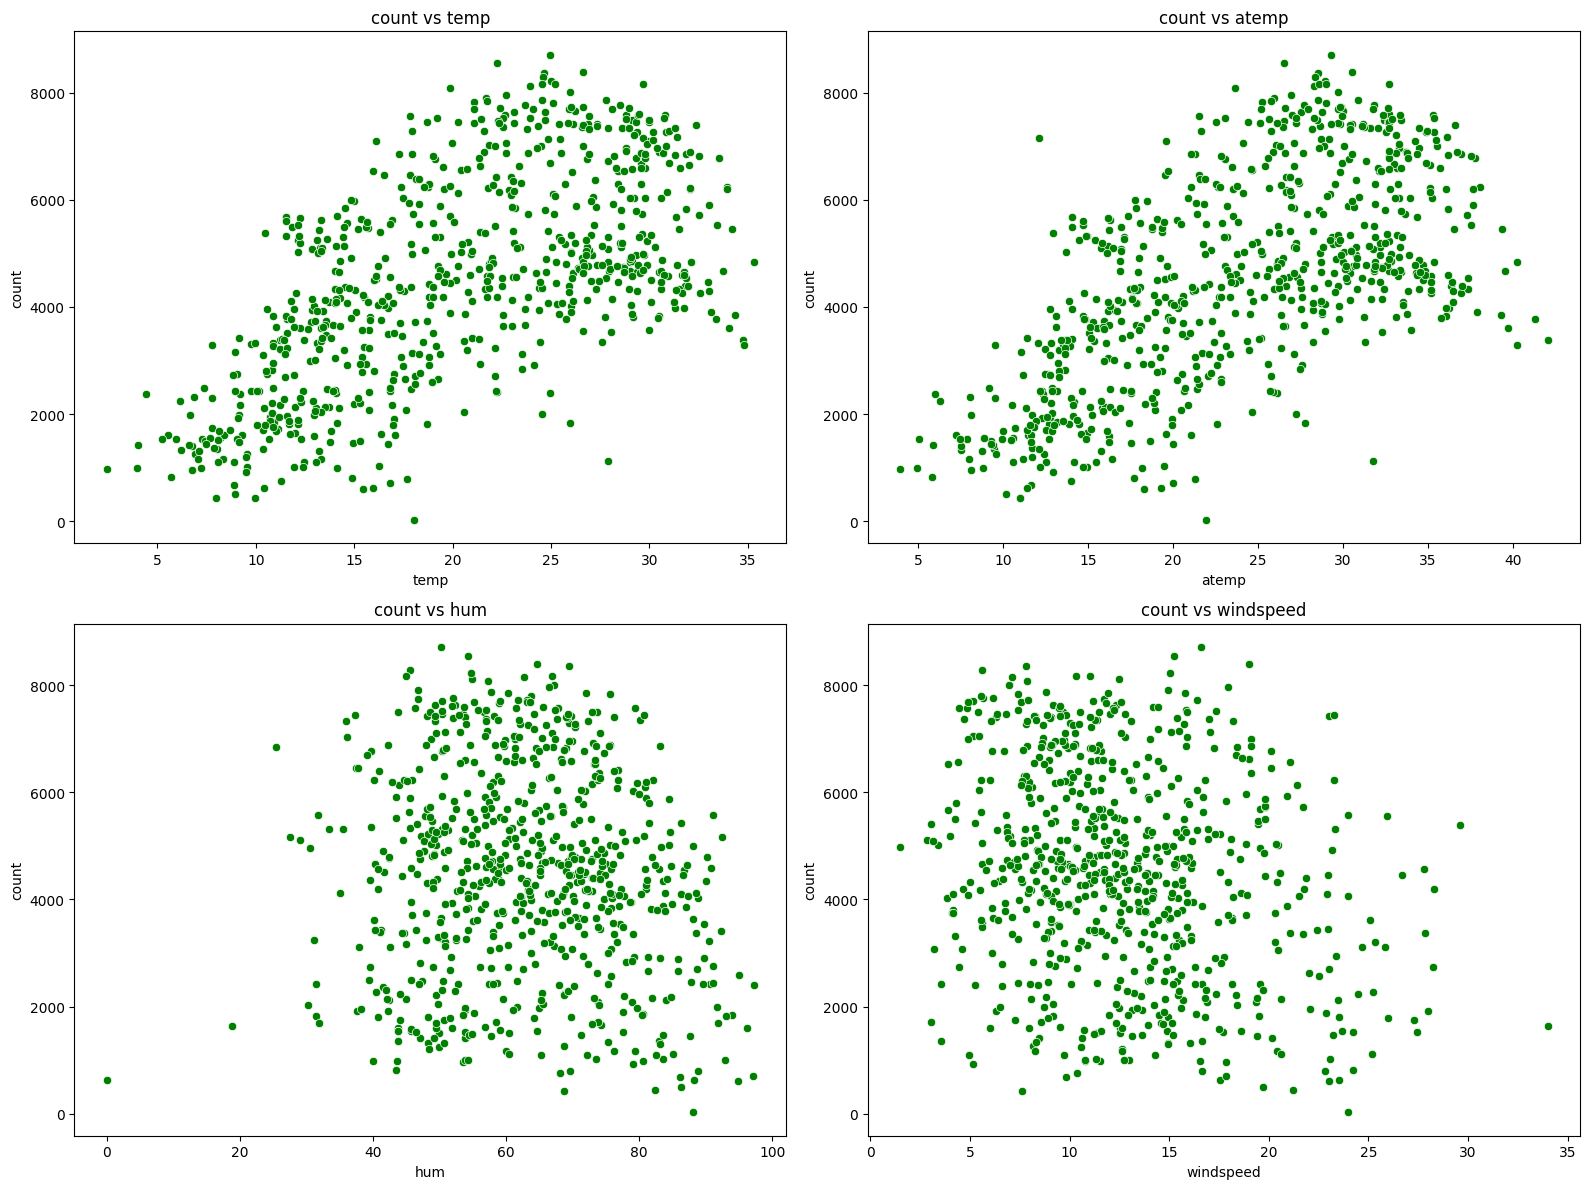

In [54]:
selected_columns = ["temp", "atemp", "hum", "windspeed"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(selected_columns):
    sns.scatterplot(
        x=col,
        y="count",
        data=day_df,
        ax=axs[i // 2, i % 2],
        color="green",
    )
    axs[i // 2, i % 2].set_title(f"count vs {col}")

plt.tight_layout()
plt.show()

Berdasarkan observasi heatmap dan scatter plot:

1. Tampaknya jumlah pengguna penyewana sepeda memiliki positive moderate correlation dengan temp dan atemp. Hal ini berarti jumlah pengguna bike sharing meningkat seiring dengan meningkatnya suhu.
2. Sementara itu, terdapat sedikit korelasi negatif antara hum dan windspeed dengan count.

### Pertanyaan 3: Pada musim manakah terdapat total penyewaan sepeda paling tinggi?

In [55]:
users_by_season = users_by_season.sort_values(by="count", ascending=False)
users_by_season = users_by_season.reset_index()

users_by_season

,season,casual,registered,count
0,Fall,226091,835038,1061129
1,Summer,203522,715067,918589
2,Winter,129782,711831,841613
3,Spring,60622,410726,471348


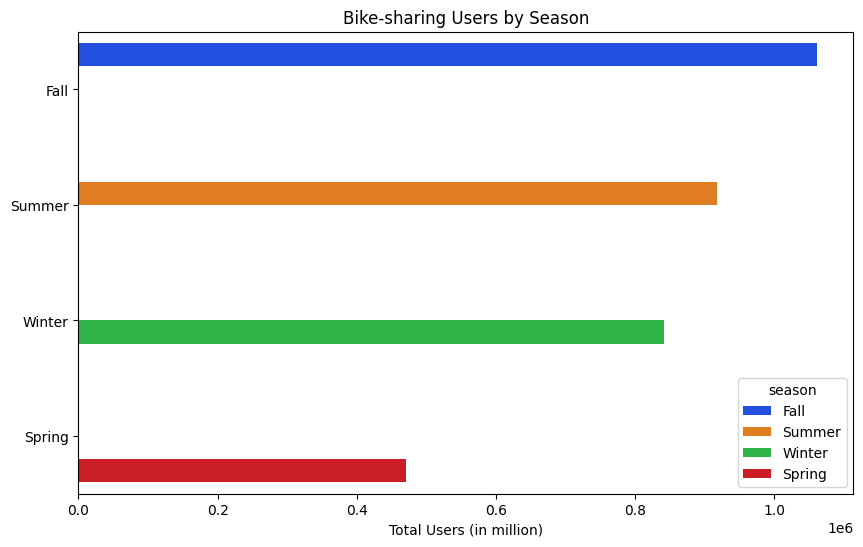

In [56]:
plt.figure(figsize=(10, 6))

plt
sns.barplot(
    x="count",
    y="season",
    hue="season",
    data=users_by_season,
    palette="bright",
)
plt.title("Bike-sharing Users by Season")
plt.xlabel("Total Users (in million)")
plt.ylabel(None)
plt.show()

In [57]:
users_by_season_unpivoted = pd.melt(
    users_by_season,
    id_vars=["season"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_season_unpivoted

,season,type,value
0,Fall,casual,226091
1,Summer,casual,203522
2,Winter,casual,129782
3,Spring,casual,60622
4,Fall,registered,835038
5,Summer,registered,715067
6,Winter,registered,711831
7,Spring,registered,410726


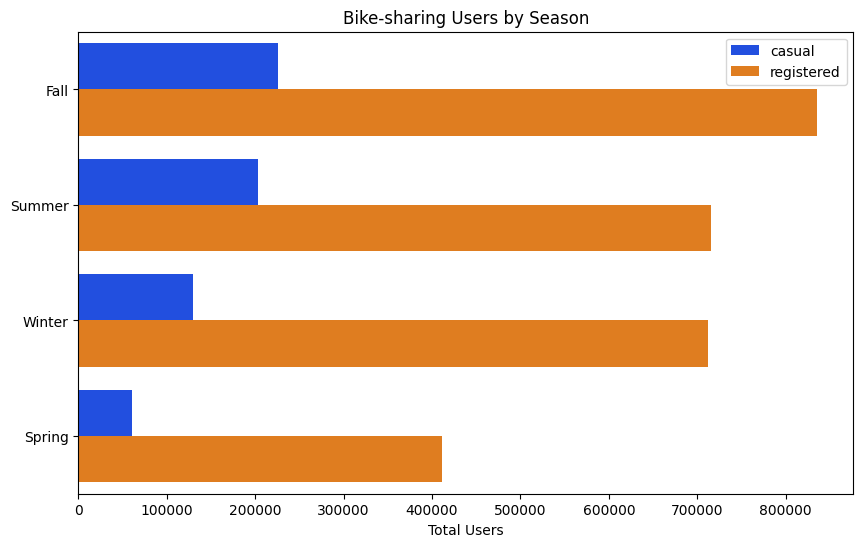

In [58]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="value",
    y="season",
    hue="type",
    data=users_by_season_unpivoted,
    palette="bright",
)
plt.title("Bike-sharing Users by Season")
plt.xlabel("Total Users")
plt.ylabel(None)
plt.legend(loc="upper right")
plt.show()

1. Penyewaan sepeda tertinggi terlihat pada musim gugur, diikuti oleh musim panas dan musim dingin, dengan penggunaan terendah pada musim semi.
2. Saat mempertimbangkan tipe/jenis pengguna, tidak ada perbedaan yang signifikan. Semua musim mengikuti pola serupa dalam jumlah total penggunanya.

### Pertanyaan 4: Bagaimanan pola penyewaan sepeda berdasarkan hari dalam seminggu?

In [59]:
users_by_weekday = users_by_weekday.reset_index()

users_by_weekday

,weekday,casual,registered,count
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


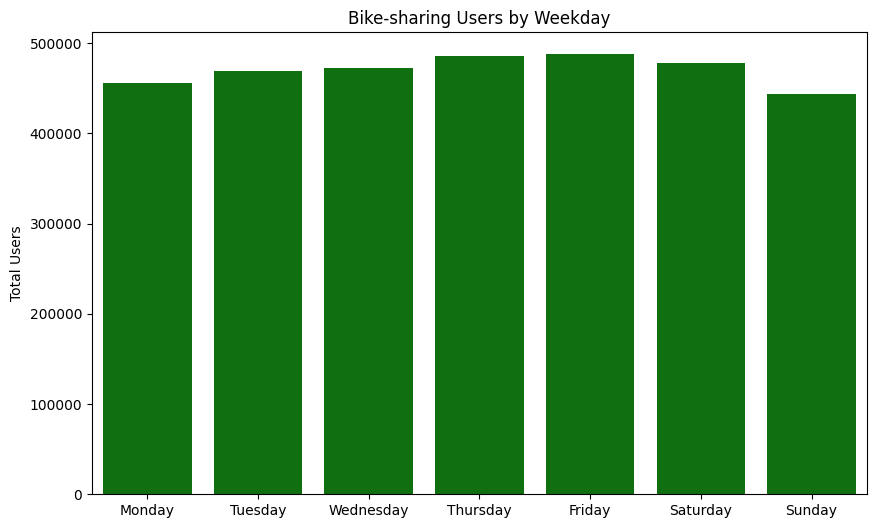

In [60]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="count",
    data=users_by_weekday,
    order=day_order,
    color="green",
)
plt.title("Bike-sharing Users by Weekday")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.show()


In [61]:
users_by_weekday_unpivoted = pd.melt(
    users_by_weekday,
    id_vars=["weekday"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_weekday_unpivoted

,weekday,type,value
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


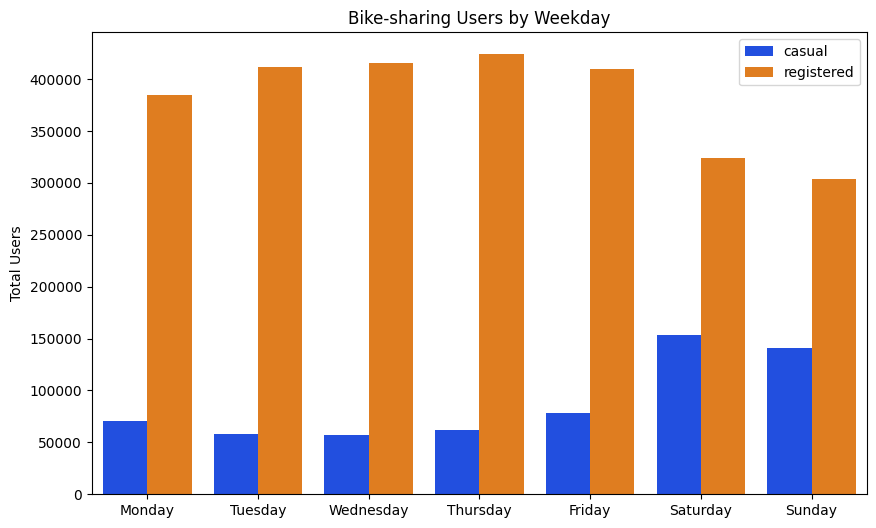

In [62]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="value",
    hue="type",
    data=users_by_weekday_unpivoted,
    order=day_order,
    palette="bright",
)
plt.title("Bike-sharing Users by Weekday")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.legend(loc="upper right")
plt.show()

In [63]:
users_by_workingday = users_by_workingday.reset_index()

users_by_workingday

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


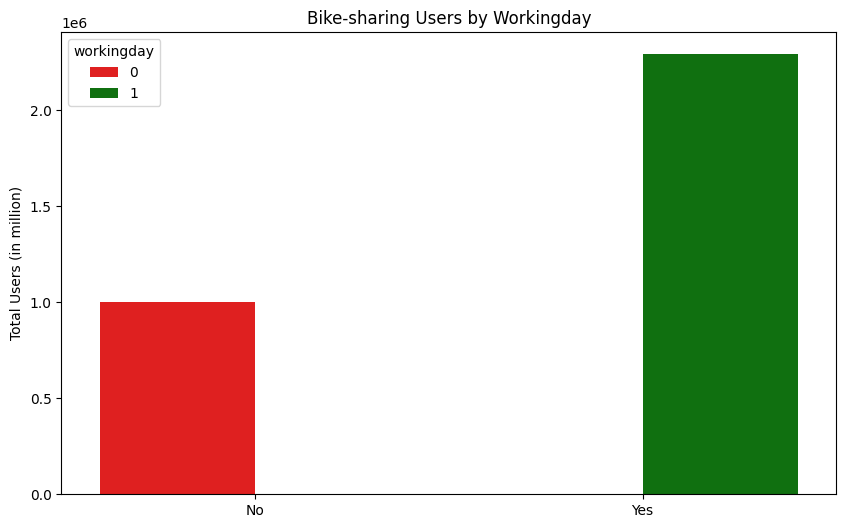

In [64]:
plt.figure(figsize=(10, 6))

plt
sns.barplot(
    x="workingday",
    y="count",
    hue="workingday",
    data=users_by_workingday,
    palette=["red", "green"],
)
plt.title("Bike-sharing Users by Workingday")
plt.xlabel(None)
plt.ylabel("Total Users (in million)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

In [65]:
users_by_holiday = users_by_holiday.reset_index()

users_by_holiday

,holiday,casual,registered,count
0,0,597658,2616586,3214244
1,1,22359,56076,78435


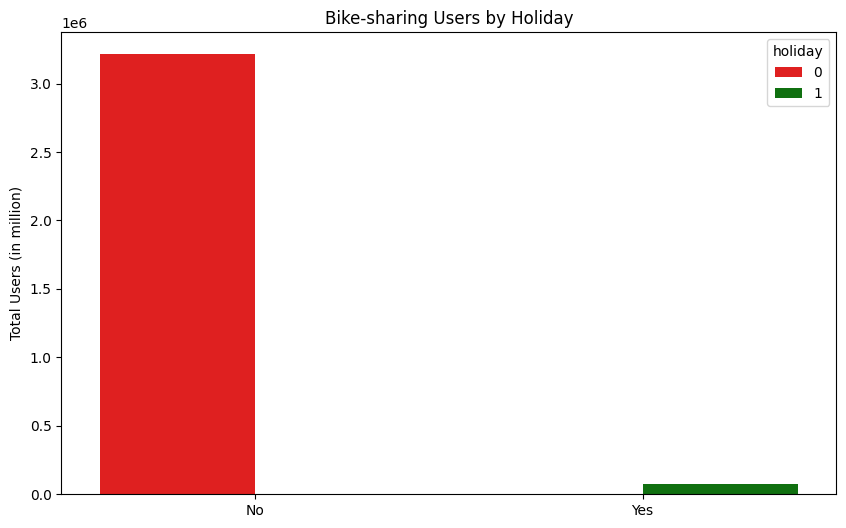

In [66]:
plt.figure(figsize=(10, 6))

plt
sns.barplot(
    x="holiday",
    y="count",
    hue="holiday",
    data=users_by_holiday,
    palette=["red", "green"],
)
plt.title("Bike-sharing Users by Holiday")
plt.xlabel(None)
plt.ylabel("Total Users (in million)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

1. Visualisasi pengguna penyewaan sepeda berdasarkan weekday menunjukkan nilai konstan setiap harinya.
2. Namun, jika dilihat berdasarkan jenis pengguna, pengguna registered cenderung lebih tinggi pada weekdays, sedangkan pengguna casual cenderung lebih tinggi pada akhir pekan.
3. Hal ini didukung oleh visualisasi pengguna penyewaan sepeda berdasarkan workingday yang menunjukkan bahwa pada hari kerja, jumlah penggunanya jauh lebih tinggi.
4. Sedangkan pada holiday, pengguna penyewaan sepeda mengalami penurunan drastis.

### Pertanyaan 5: Bagaimana efek dari cuaca terhadap jumlah total penyewaan sepeda?

In [67]:
users_by_weather = users_by_weather.reset_index()

users_by_weather

,weather,casual,registered,count
0,Clear,446346,1811606,2257952
1,Cloudy,169776,827082,996858
2,Light Rain,3895,33974,37869


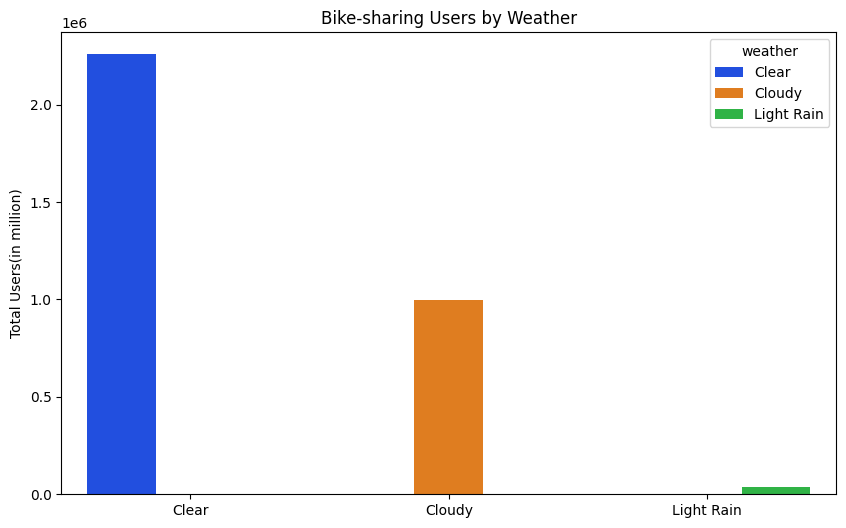

In [68]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="weather",
    y="count",
    hue="weather",
    data=users_by_weather,
    palette="bright",
)
plt.title("Bike-sharing Users by Weather")
plt.xlabel(None)
plt.ylabel("Total Users(in million)")
plt.show()


In [69]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
temp_count_etc = day_df[selected_columns]

temp_count_etc.corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


<Axes: >

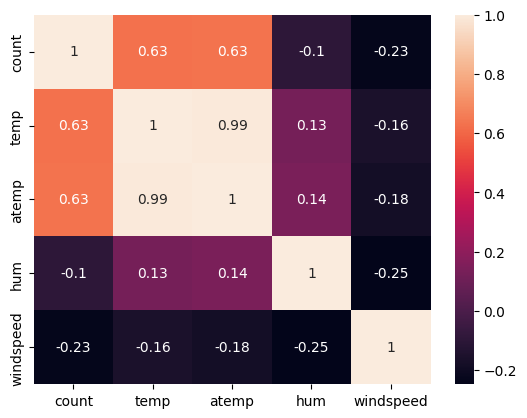

In [70]:
sns.heatmap(temp_count_etc.corr(numeric_only=True), annot=True)

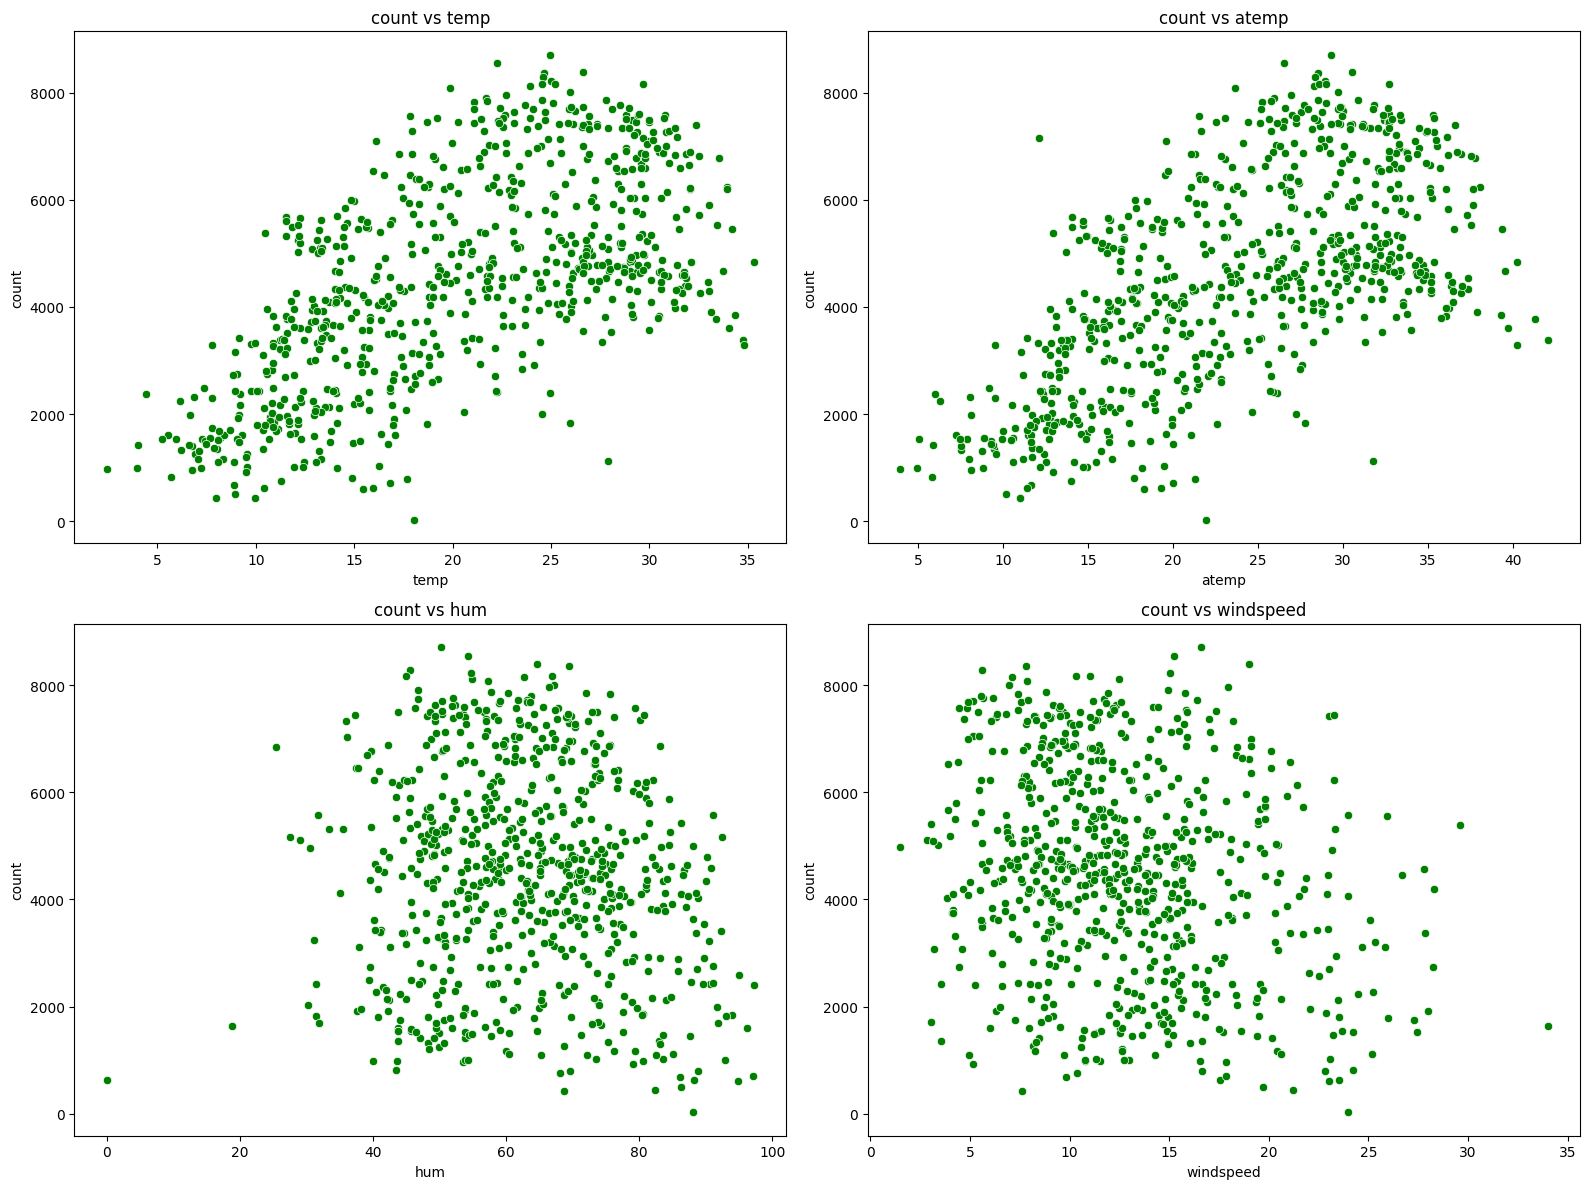

In [71]:
selected_columns = ["temp", "atemp", "hum", "windspeed"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(selected_columns):
    sns.scatterplot(
        x=col,
        y="count",
        data=day_df,
        ax=axs[i // 2, i % 2],
        color="green",
    )
    axs[i // 2, i % 2].set_title(f"count vs {col}")

plt.tight_layout()
plt.show()

Berdasarkan observasi heatmap dan scatter plot:

1. Tampaknya jumlah pengguna penyewaan sepeda memiliki positive moderate correlation  dengan temp dan atemp. Hal ini berarti jumlah pengguna penyewaan sepeda meningkat seiring dengan meningkatnya suhu.
2. Sementara itu, terdapat sedikit korelasi negatif antara hum, windspeed dengan count.

## 6. **Conclusion**

1. Bagaimana perbandingan jumlah pengguna penyewaan sepeda yang registered dengan pengguna casual?

  Jumlah pengguna penyewaan sepeda registered, berjumlah 2,6 juta, jauh lebih tinggi dibandingkan pengguna biasa, yang berjumlah 600.000. Hal ini menunjukkan perbedaan yang besar, dengan jumlah pengguna registered sekitar 4x lebih banyak dibandingkan pengguna casual.

2. Apakah terdapat korelasi antara kondisi tempratur dengan jumlah pengguna penyewaan sepeda?

  Berdasarkan pengamatan/observasi dari heatmap dan scatter plot, dapat diketahui bahwa terdapat adanya korelasi antara kondisi suhu dan jumlah pengguna penyewaan sepeda. Terdapat  positive moderate correlation, sekitar 0,6 poin, dengan temp dan atemp, yang menunjukkan bahwa jumlah pengguna penyewaan sepeda cenderung meningkat seiring kenaikan suhu. Selain itu, terdapat sedikit korelasi negatif, sekitar -0,1 poin untuk hum dan -0,23 poin untuk windspeed, yang menyiratkan bahwa seiring dengan peningkatan kelembapan dan kecepatan angin, terdapat sedikit penurunan jumlah pengguna penyewaan sepeda.

3. Pada musim manakah terdapat total penyewaan sepeda paling tinggi?

 Penyewaan sepeda paling tinggi terjadi selama musim gugur, dengan 1 juta pengguna. Musim panas dan musim dingin menyusul, sementara penggunaannya relatif lebih rendah di musim semi, dengan sekitar 470.000 pengguna. Menariknya, saat memeriksa jenis pengguna, tidak ada perbedaan mencolok dalam pola musiman, karena semua musim menunjukkan tren jumlah total pengguna yang serupa.

4. Bagaimanan pola penyewaan sepeda berdasarkan hari dalam seminggu?

  Pola penggunaan pada layanan penyewaan sepeda berdasarkan hari dalam seminggu menunjukkan nilai keseluruhan yang konsisten sekitar 400.000 pengguna setiap hari. Namun, jika dilihat lebih dekat berdasarkan jenis pengguna, terlihat bahwa pengguna registered/terdaftar cenderung lebih tinggi pada workingday/hari kerja, sedangkan pengguna casual/biasa menunjukkan penggunaan lebih tinggi pada weekend/akhir pekan. Tren ini sejalan dengan perbedaan yang terlihat pada visualisasi pengguna penyewaan sepeda pada workingday, dimana jumlah totalnya meningkat signifikan menjadi 2,3 juta. Sebaliknya, pada holiday, pengguna penyewaan sepeda mengalami penurunan drastis hingga hanya mencapai 78.000.

5. Bagaimana efek dari cuaca terhadap jumlah total penyewaan sepeda?
  
  Analisis barplot menunjukkan bahwa cuaca mempunyai pengaruh yang signifikan terhadap penggunaan layanan penyewaan sepeda. Sekitar 3/4 pengguna, berjumlah 2,3 juta, lebih memilih bersepeda saat cuaca cerah. Menariknya, saat hujan deras, tidak ada pengguna bike sharing sama sekali. Hal ini menunjukkan adanya pengaruh kondisi cuaca terhadap pilihan menggunakan layanan bike sharing.